In [1]:
import seaborn as sns
import pickle
import numpy as np
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
res = pd.read_csv('notebook/predictions_top100_english.csv').T.values

res.shape

(100, 2007006)

In [3]:
column_names = [c[11:] for c in 
pd.read_csv('/home/samory/reddeat/notebook/study_subreddits_english.csv', index_col=0, names=['subreddit']).values.flatten()]


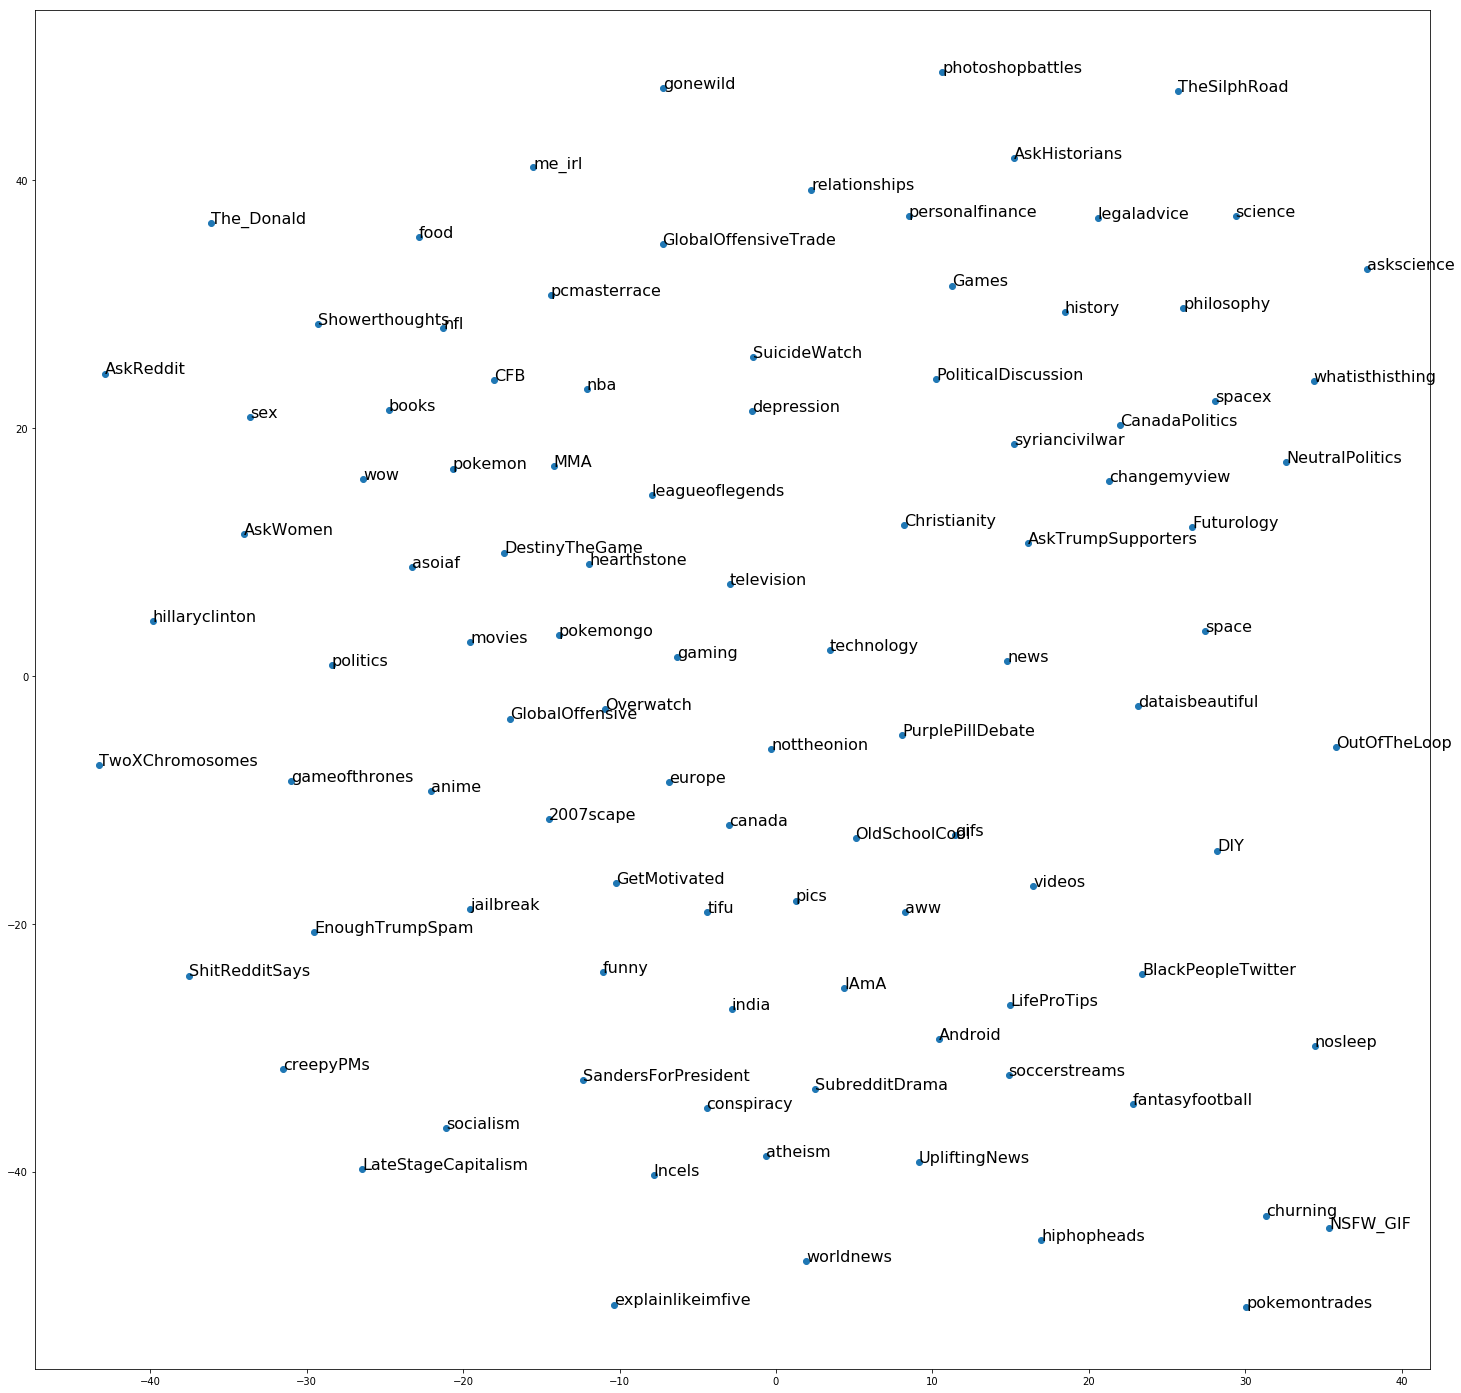

In [4]:
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE, Isomap

# tsvd = TruncatedSVD()
# proj = tsvd.fit_transform(res)

# iso = Isomap()
# proj = iso.fit_transform(res)

tsne = TSNE()
proj = tsne.fit_transform(res)

fig = plt.figure(figsize=(25, 25))
gca().scatter(proj[:,0], proj[:,1])
for label, (x, y) in zip(column_names, proj):
    t = gca().text(x, y, label,
#         t = plt.text(x+np.random.normal(), y+np.random.normal()*2, label,
        fontdict={'weight': 'regular', 'size': 16}, )




In [76]:
import community #python-louvain
import networkx as nx

G = nx.Graph(name='agreement')

res = pickle.load(open('../agreement_top100_english.p', 'rb'))
for i in range(len(res)):
    for j in range(i+1, len(res)):
        G.add_edge(column_names[i],column_names[j],weight=res[i,j])


partition = community.best_partition(G, resolution=.95) #<--- this is the param you want to tweak

size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
list_partitions = []
for com in set(partition.values()):
    count = count + 1.

    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    list_partitions.append(list_nodes)
    print list_nodes

['asoiaf', 'pokemon', 'relationships', 'Showerthoughts', 'leagueoflegends', 'food', 'gonewild', 'nfl', 'MMA', 'pokemongo', 'AskWomen', 'CFB', 'books', 'nba', 'wow', 'DestinyTheGame', 'pcmasterrace', 'GlobalOffensiveTrade', 'me_irl']
['PurplePillDebate', 'canada', 'technology']
['AskTrumpSupporters', 'PoliticalDiscussion', 'spacex', 'syriancivilwar', 'AskHistorians', 'photoshopbattles', 'NeutralPolitics', 'science', 'history', 'whatisthisthing', 'sex', 'changemyview', 'space', 'askscience', 'TheSilphRoad', 'Futurology', 'philosophy', 'legaladvice', 'Games', 'CanadaPolitics', 'Christianity', 'personalfinance']
['churning', 'dataisbeautiful', 'tifu', '2007scape', 'hiphopheads', 'explainlikeimfive', 'gifs', 'NSFW_GIF', 'worldnews', 'LifeProTips', 'BlackPeopleTwitter', 'Incels', 'SubredditDrama', 'videos', 'india', 'Android', 'fantasyfootball', 'funny', 'IAmA', 'conspiracy', 'pokemontrades', 'OldSchoolCool', 'pics', 'atheism', 'nosleep', 'GetMotivated']
['GlobalOffensive', 'gaming']
['OutOf

In [77]:
from collections import defaultdict

In [78]:
#unique color indices
colors = {k:(len(j)>1 and i+1 or 0) for (i, j) in enumerate(sorted(list_partitions, key=lambda x:len(x), reverse=True)) for k in j}

In [79]:
max(colors.values())

13

In [80]:
cmap=cm.get_cmap('Paired', )

In [81]:
from colorsys import hls_to_rgb
def get_distinct_colors(n):

    colors = []

    for i in np.arange(0., 360., 360. / n):
        h = i / 360.
        l = (50 + np.random.rand() * 10) / 100.
        s = (90 + np.random.rand() * 10) / 100.
        colors.append(hls_to_rgb(h, l, s))

    return colors
n_colors = max(colors.values())-min(colors.values())+1
the_colors = get_distinct_colors(n_colors)

In [82]:
# sns.palplot(sns.color_palette("hls", n_colors))
# sns.palplot(np.random.choice(sns.xkcd_rgb.values(), n_colors))

In [83]:
the_colors[0] = 'grey'

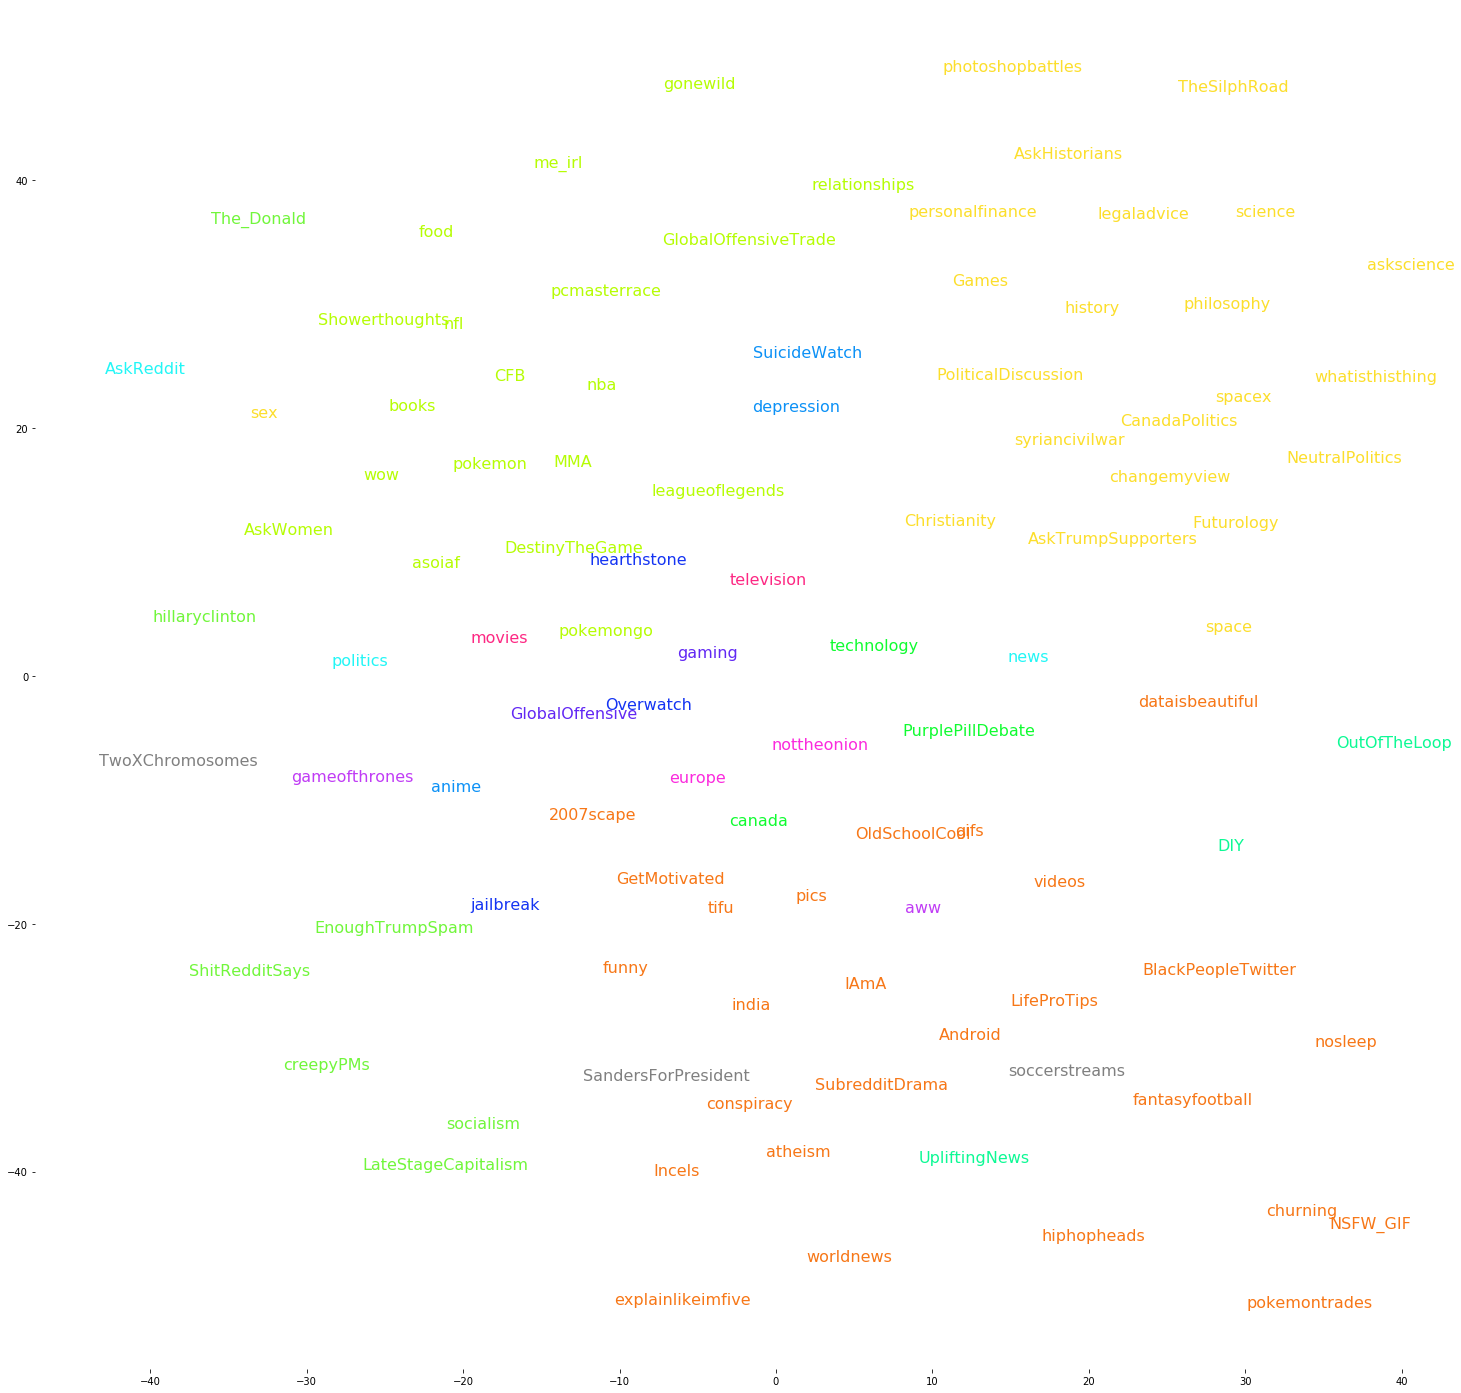

In [84]:
fig = plt.figure(figsize=(25, 25))
gca().scatter(proj[:,0], proj[:,1], s=0)
for label, (x, y) in zip(column_names, proj):
    t = gca().text(x, y, label,
#         t = plt.text(x+np.random.normal(), y+np.random.normal()*2, label,
        fontdict={'weight': 'regular', 'size': 16, 'color':the_colors[colors[label]]}, )
sns.despine(left=True, bottom=True)